### 1. In all types of SGD's the least time is taken by the " SGD with momentum and Nesterov "
### 2. Adam is winner and SGD with M and Nes are both good

In [1]:
import pandas as pd
from pandas import read_csv
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
#print(type(x))
print(column_names)
print(type(column_names))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
<class 'list'>


In [4]:
l1 = df.columns
l1 = l1.to_list()
print(l1)
print(type(l1))

['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']
<class 'list'>


In [5]:
df.columns = column_names
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [6]:
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
df.head(2)
df.drop(columns = {'ID'}, inplace=True)

In [7]:
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [9]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)

(30000, 23) (30000,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
print(X.shape, X.dtype)

(30000, 23) float64


In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , random_state = 42)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(27000, 23) (3000, 23)
(27000,) (3000,)


In [14]:
n_features  = X.shape[1]
n_features

23

# SGD simple with all records

In [15]:
model = Sequential()
model.add(Dense(units=70, activation='relu', kernel_initializer='he_uniform', input_dim=n_features))
model.add(Dense(1, activation='sigmoid'))

In [22]:
# compile the model
#model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy']) # Adamax(optimozor) Alternative
opt = tf.keras.optimizers.SGD(
            learning_rate=0.001, momentum=0.0, nesterov=False, name='SGD')

model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [23]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 ,epochs=60, verbose=2)

Epoch 1/60
760/760 - 2s - loss: 0.4245 - accuracy: 0.8208 - val_loss: 0.4519 - val_accuracy: 0.8052
Epoch 2/60
760/760 - 1s - loss: 0.4243 - accuracy: 0.8206 - val_loss: 0.4518 - val_accuracy: 0.8056
Epoch 3/60
760/760 - 1s - loss: 0.4242 - accuracy: 0.8208 - val_loss: 0.4519 - val_accuracy: 0.8044
Epoch 4/60
760/760 - 1s - loss: 0.4242 - accuracy: 0.8212 - val_loss: 0.4518 - val_accuracy: 0.8059
Epoch 5/60
760/760 - 1s - loss: 0.4242 - accuracy: 0.8210 - val_loss: 0.4519 - val_accuracy: 0.8067
Epoch 6/60
760/760 - 1s - loss: 0.4242 - accuracy: 0.8211 - val_loss: 0.4519 - val_accuracy: 0.8063
Epoch 7/60
760/760 - 1s - loss: 0.4242 - accuracy: 0.8210 - val_loss: 0.4519 - val_accuracy: 0.8067
Epoch 8/60
760/760 - 1s - loss: 0.4241 - accuracy: 0.8210 - val_loss: 0.4519 - val_accuracy: 0.8063
Epoch 9/60
760/760 - 1s - loss: 0.4241 - accuracy: 0.8211 - val_loss: 0.4518 - val_accuracy: 0.8059
Epoch 10/60
760/760 - 1s - loss: 0.4241 - accuracy: 0.8212 - val_loss: 0.4518 - val_accuracy: 0.8074

In [24]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4339 - accuracy: 0.8147
Test Accuracy: 81.47
loss is : 0.43


# SGD with Batch_size records and simple

In [27]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 20 ,epochs=60, verbose=2)

Epoch 1/60
1215/1215 - 2s - loss: 0.4235 - accuracy: 0.8216 - val_loss: 0.4517 - val_accuracy: 0.8044
Epoch 2/60
1215/1215 - 2s - loss: 0.4235 - accuracy: 0.8216 - val_loss: 0.4517 - val_accuracy: 0.8078
Epoch 3/60
1215/1215 - 2s - loss: 0.4235 - accuracy: 0.8214 - val_loss: 0.4518 - val_accuracy: 0.8056
Epoch 4/60
1215/1215 - 2s - loss: 0.4235 - accuracy: 0.8220 - val_loss: 0.4518 - val_accuracy: 0.8078
Epoch 5/60
1215/1215 - 2s - loss: 0.4234 - accuracy: 0.8218 - val_loss: 0.4517 - val_accuracy: 0.8078
Epoch 6/60
1215/1215 - 2s - loss: 0.4235 - accuracy: 0.8222 - val_loss: 0.4517 - val_accuracy: 0.8063
Epoch 7/60
1215/1215 - 2s - loss: 0.4234 - accuracy: 0.8218 - val_loss: 0.4519 - val_accuracy: 0.8056
Epoch 8/60
1215/1215 - 2s - loss: 0.4234 - accuracy: 0.8216 - val_loss: 0.4518 - val_accuracy: 0.8067
Epoch 9/60
1215/1215 - 2s - loss: 0.4233 - accuracy: 0.8218 - val_loss: 0.4518 - val_accuracy: 0.8074
Epoch 10/60
1215/1215 - 2s - loss: 0.4234 - accuracy: 0.8217 - val_loss: 0.4518 - 

In [28]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4340 - accuracy: 0.8167
Test Accuracy: 81.67
loss is : 0.43


# SGD with momentum and without Nesterov

In [32]:
opt = tf.keras.optimizers.SGD(
            learning_rate=0.01, momentum=0.95, nesterov=False, name='SGD')

model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [33]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 20 ,epochs=60, verbose=2)

Epoch 1/60
1215/1215 - 2s - loss: 0.4464 - accuracy: 0.8124 - val_loss: 0.4771 - val_accuracy: 0.7944
Epoch 2/60
1215/1215 - 1s - loss: 0.4411 - accuracy: 0.8154 - val_loss: 0.4647 - val_accuracy: 0.8000
Epoch 3/60
1215/1215 - 1s - loss: 0.4375 - accuracy: 0.8166 - val_loss: 0.4589 - val_accuracy: 0.8019
Epoch 4/60
1215/1215 - 1s - loss: 0.4353 - accuracy: 0.8182 - val_loss: 0.4641 - val_accuracy: 0.8026
Epoch 5/60
1215/1215 - 1s - loss: 0.4336 - accuracy: 0.8175 - val_loss: 0.4652 - val_accuracy: 0.7922
Epoch 6/60
1215/1215 - 1s - loss: 0.4346 - accuracy: 0.8176 - val_loss: 0.4772 - val_accuracy: 0.7978
Epoch 7/60
1215/1215 - 1s - loss: 0.4362 - accuracy: 0.8173 - val_loss: 0.4883 - val_accuracy: 0.7859
Epoch 8/60
1215/1215 - 1s - loss: 0.4328 - accuracy: 0.8184 - val_loss: 0.4617 - val_accuracy: 0.7974
Epoch 9/60
1215/1215 - 1s - loss: 0.4303 - accuracy: 0.8183 - val_loss: 0.4653 - val_accuracy: 0.8048
Epoch 10/60
1215/1215 - 1s - loss: 0.4322 - accuracy: 0.8193 - val_loss: 0.4665 - 

In [34]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4454 - accuracy: 0.8137
Test Accuracy: 81.37
loss is : 0.45


# SGD with momentum and Nesterov

In [21]:
opt = tf.keras.optimizers.SGD(
            learning_rate=0.005, momentum=0.95, nesterov=True, name='SGD')

model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [22]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 20 ,epochs=60, verbose=2)

Epoch 1/60
1215/1215 - 2s - loss: 0.4331 - accuracy: 0.8195 - val_loss: 0.4682 - val_accuracy: 0.7974
Epoch 2/60
1215/1215 - 1s - loss: 0.4300 - accuracy: 0.8207 - val_loss: 0.4698 - val_accuracy: 0.8011
Epoch 3/60
1215/1215 - 1s - loss: 0.4292 - accuracy: 0.8198 - val_loss: 0.4664 - val_accuracy: 0.7948
Epoch 4/60
1215/1215 - 1s - loss: 0.4271 - accuracy: 0.8220 - val_loss: 0.4822 - val_accuracy: 0.7993
Epoch 5/60
1215/1215 - 1s - loss: 0.4299 - accuracy: 0.8207 - val_loss: 0.4679 - val_accuracy: 0.8033
Epoch 6/60
1215/1215 - 1s - loss: 0.4257 - accuracy: 0.8216 - val_loss: 0.4623 - val_accuracy: 0.7993
Epoch 7/60
1215/1215 - 1s - loss: 0.4238 - accuracy: 0.8235 - val_loss: 0.4671 - val_accuracy: 0.8019
Epoch 8/60
1215/1215 - 1s - loss: 0.4227 - accuracy: 0.8239 - val_loss: 0.4532 - val_accuracy: 0.8022
Epoch 9/60
1215/1215 - 1s - loss: 0.4213 - accuracy: 0.8235 - val_loss: 0.4641 - val_accuracy: 0.7952
Epoch 10/60
1215/1215 - 1s - loss: 0.4218 - accuracy: 0.8238 - val_loss: 0.4572 - 

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4440 - accuracy: 0.8203
Test Accuracy: 82.03
loss is : 0.44


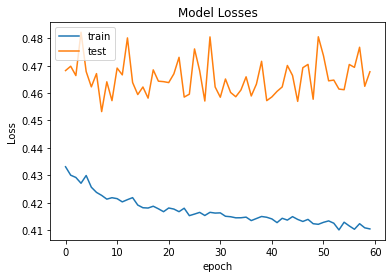

In [24]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

# using ADAM

In [25]:
opt = tf.keras.optimizers.Adam(
      learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
      name='Adam'
)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [26]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 20 ,epochs=60, verbose=2)

Epoch 1/60
1215/1215 - 2s - loss: 0.4483 - accuracy: 0.8141 - val_loss: 0.4923 - val_accuracy: 0.7793
Epoch 2/60
1215/1215 - 1s - loss: 0.4382 - accuracy: 0.8190 - val_loss: 0.4691 - val_accuracy: 0.7967
Epoch 3/60
1215/1215 - 1s - loss: 0.4356 - accuracy: 0.8191 - val_loss: 0.4634 - val_accuracy: 0.8056
Epoch 4/60
1215/1215 - 1s - loss: 0.4365 - accuracy: 0.8196 - val_loss: 0.4558 - val_accuracy: 0.8081
Epoch 5/60
1215/1215 - 1s - loss: 0.4342 - accuracy: 0.8211 - val_loss: 0.4567 - val_accuracy: 0.8122
Epoch 6/60
1215/1215 - 1s - loss: 0.4332 - accuracy: 0.8188 - val_loss: 0.4584 - val_accuracy: 0.8100
Epoch 7/60
1215/1215 - 1s - loss: 0.4339 - accuracy: 0.8202 - val_loss: 0.4542 - val_accuracy: 0.8081
Epoch 8/60
1215/1215 - 1s - loss: 0.4334 - accuracy: 0.8201 - val_loss: 0.4521 - val_accuracy: 0.8081
Epoch 9/60
1215/1215 - 1s - loss: 0.4326 - accuracy: 0.8218 - val_loss: 0.4572 - val_accuracy: 0.8104
Epoch 10/60
1215/1215 - 1s - loss: 0.4322 - accuracy: 0.8207 - val_loss: 0.4580 - 

In [27]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

94/94 - 0s - loss: 0.4464 - accuracy: 0.8173
Test Accuracy: 81.73
loss is : 0.45


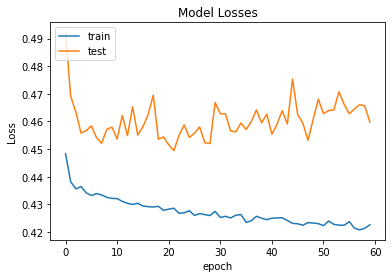

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()